# Control Systems 1, NB03: Time Response and Stability
2024 ETH Zurich, Mark Benazet Castells, Jonas Holinger, Felix Muller, Matteo Penlington; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli


This interactive notebook is designed to introduce fundamental concepts in control systems engineering. It covers the basics of system modeling, classification, and analysis, with a focus on building intuition through visual and interactive examples.

Authors:
- Jonas Holinger; jholinger@ethz.ch


## Learning Objectives

After completing this notebook, you should be able to:

1. Understand how to compute the general form response of a linear system by adding its inital condition response and its forced response
2. Understand the several definitions of stability for a dynamical system
3. Understand wether a LTI system is stable or unstable by looking at the eigenvalues of the A Matrix

# Setup

## Installing the required packages:


In [2]:
%pip install numpy matplotlib scipy ipywidgets control IPython

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Zundi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


## Import the packages
The following cell imports the required packages. Run it before running the rest of the notebook.

In [3]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output, Math

## 1. Output Response of a Linear System
If we want to calculate the output of a LTI system we can seperate the problem into two cases:
- **Initial-conditions response:**

  $$
  \left\{
  \begin{array}{ll}
  x_{IC}(0) = x_0 \\
  u_{IC}(t) = 0
  \end{array}
  \right.
  \quad \longrightarrow \quad y_{IC};
  $$

- **Forced response:**

  $$
  \left\{
  \begin{array}{ll}
  x_{F}(0) = 0 \\
  u_{F}(t) = u(t)
  \end{array}
  \right.
  \quad \longrightarrow \quad y_{F}.
  $$



From previous lectures we learned that the definition of linear system is: $$
\Sigma (\alpha u_a + \beta u_b) = \alpha (\Sigma u_a) + \beta (\Sigma u_b) = \alpha y_a + \beta y_b
$$
and we also know that due to causality the  system can be summarised by a state $x(t)$.
Because of these properties, the output of an linear  system can be expressed as: $$y = y_{IC}+y_{F}$$

### 1.1 Example: Output Response of a Scalar Linear System
As an example of a scalar linear system,let us consider a Room with Temperatur $T(t)$, inital Temperatur of the Room $T_0$ and thermal capacity C. The Temperatur outside is $T_{amb}$ and the Room gets heated with power P(t) and loses heat given by the eqution $G(T(t) - T_{amb})$ where $G$ is the thermal conductance. The system is described by the following formula from Thermodynamics: $$C \frac{dT(t)}{dt} + G \left(T(t) - T_{\text{ambient}}\right) = P(t)$$


![Image Title](./media/sys4iofo.png)


We choose $T(t)$ as our state and $P(t)$ as our input:
$$y(t) = x(t) = T(t)$$
$$u(t) = P(t)$$
$$\dot{x}(t) = \frac{-G}{C} x(t) + \frac{1}{C} u(t) + \frac{G T_{\text{amb}}}{C}$$
\
Since its winter we assume $T_{amb}$ is 0. This gives us the following state space model:
$$a=-G/C$$
$$b = 1/C$$
$$c = 1$$
$$d = 0$$



In [11]:
#initalise the system

# Define a time vector
time = np.linspace(0, 20, 500)

#Define the param
C = 2
G = 3

# Define state-space system
def create_system(G, C):
    A = -G / C
    B = 1 / C
    C_matrix = 1
    D = 0
    return ct.StateSpace(A, B, C_matrix, D)

# func for generating input
def generate_input(input_type, time_vector):
    if input_type == 'Constant':
        return np.full_like(time_vector, forced_input_slider.value)
    elif input_type == 'Ramp (5s)':
        ramp_duration = 5
        ramp_input = np.clip(np.linspace(0, forced_input_slider.value, int(ramp_duration / time[1])),
                              0, None)
        constant_input = np.full_like(time_vector[int(ramp_duration / time[1]):], forced_input_slider.value)
        return np.concatenate((ramp_input, constant_input))
    elif input_type == 'Ramp (15s)':
        ramp_duration = 15
        ramp_input = np.clip(np.linspace(0, forced_input_slider.value, int(ramp_duration / time[1])),
                              0, None)
        constant_input = np.full_like(time_vector[int(ramp_duration / time[1]):], forced_input_slider.value)
        return np.concatenate((ramp_input, constant_input))
    elif input_type == 'Sinusoidal':
        return forced_input_slider.value * np.sin(0.5 * np.pi * time_vector)  # Frequency can be adjusted

### 1.1 Inital Condition Response
To get the inital condition response for the system we need to solve the following ODE;
$$
\dot{x}_{IC}(t) = a*x(t)_{IC}, 
$$
$$
y(t)_{IC}=cx(t)_{IC}
$$
$$
x(0) = x_0
$$

The general solution is known from Analysis 2:
$$
x(t)_{IC} = e^{at}T_0
$$

$$
y(t) = ce^{at}T_0
$$
For our specific problem we get:
$$
y(t) = e^{\frac{-G}{C}}T_0
$$

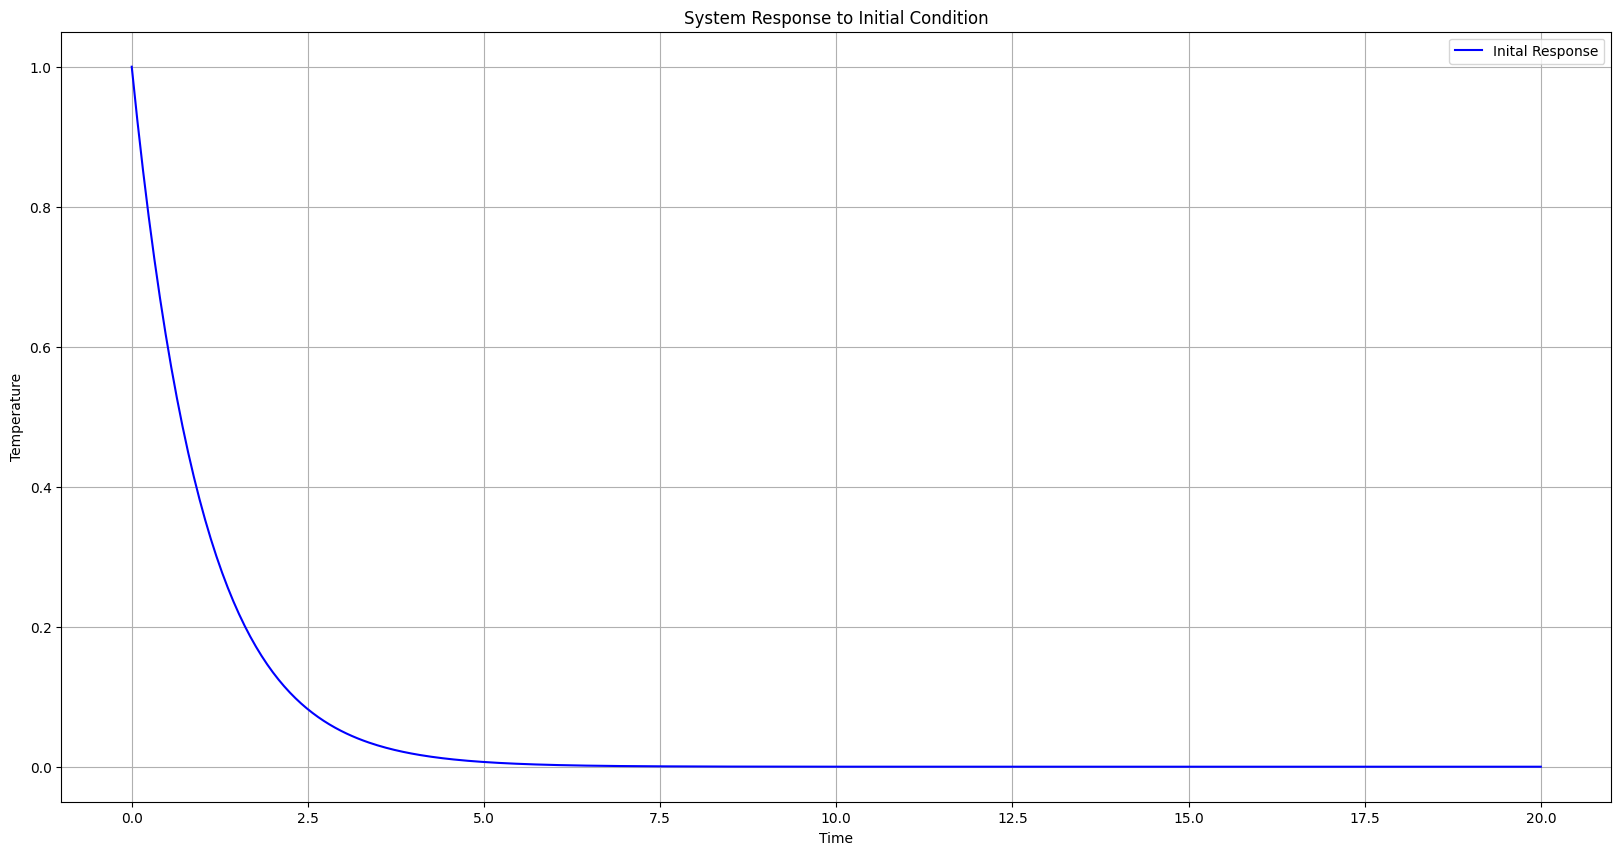

FloatSlider(value=1.0000000000000002, description='G:', max=5.0, min=0.1)

FloatSlider(value=1.0000000000000002, description='C:', max=5.0, min=0.1)

FloatSlider(value=1.0, description='T0:', max=20.0, min=-20.0, step=0.5)

<IPython.core.display.Math object>

In [12]:
def update_plot_ic(t_0):
    clear_output(wait=True)  # Clear previous output
    system = create_system(G_slider.value, C_slider.value)  
    plt.figure(figsize=(20, 10))
    
    # Simulate the response to the current initial condition
    t, y = ct.initial_response(system, T=time, X0=[t_0])
    
    # Plot the responses
    plt.plot(t, y, label='Inital Response', color='blue')
    plt.title('System Response to Initial Condition')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.grid()
    plt.legend()
    plt.show()
    
    formula = f"y(t) = e^{{\\frac{{-{G_slider.value}}}{{{C_slider.value}}}}} {{{t_0}}}"
    # Display sliders and dropdown again
    display(G_slider, C_slider, t_0_slider)
    display(Math(formula))
    
G_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='G:')
C_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='C:')
t_0_slider = widgets.FloatSlider(value=1.0, min=-20, max=20, step=0.5, description='T0:')

# Observers for the sliders and dropdown
G_slider.observe(lambda change: update_plot_ic(t_0_slider.value), names='value')
C_slider.observe(lambda change: update_plot_ic(t_0_slider.value), names='value')
t_0_slider.observe(lambda change: update_plot_ic(t_0_slider.value), names='value')

# Display sliders and initial plot
display(G_slider, C_slider, t_0_slider)
update_plot_ic(t_0_slider.value)




### 1.2 Forced Response

The forced response, which was derived in the lecture with $u(t) \neq 0$ and $x_0 = 0$ is:
$$ x_{FC}=\int_{0}^{t}e^{a\cdot (t-\tau )}bu(\tau )d\tau $$
$$  y_{FC}=\int_{0}^{t}e^{a\cdot (t-\tau )}bu(\tau )d\tau + du(t)$$

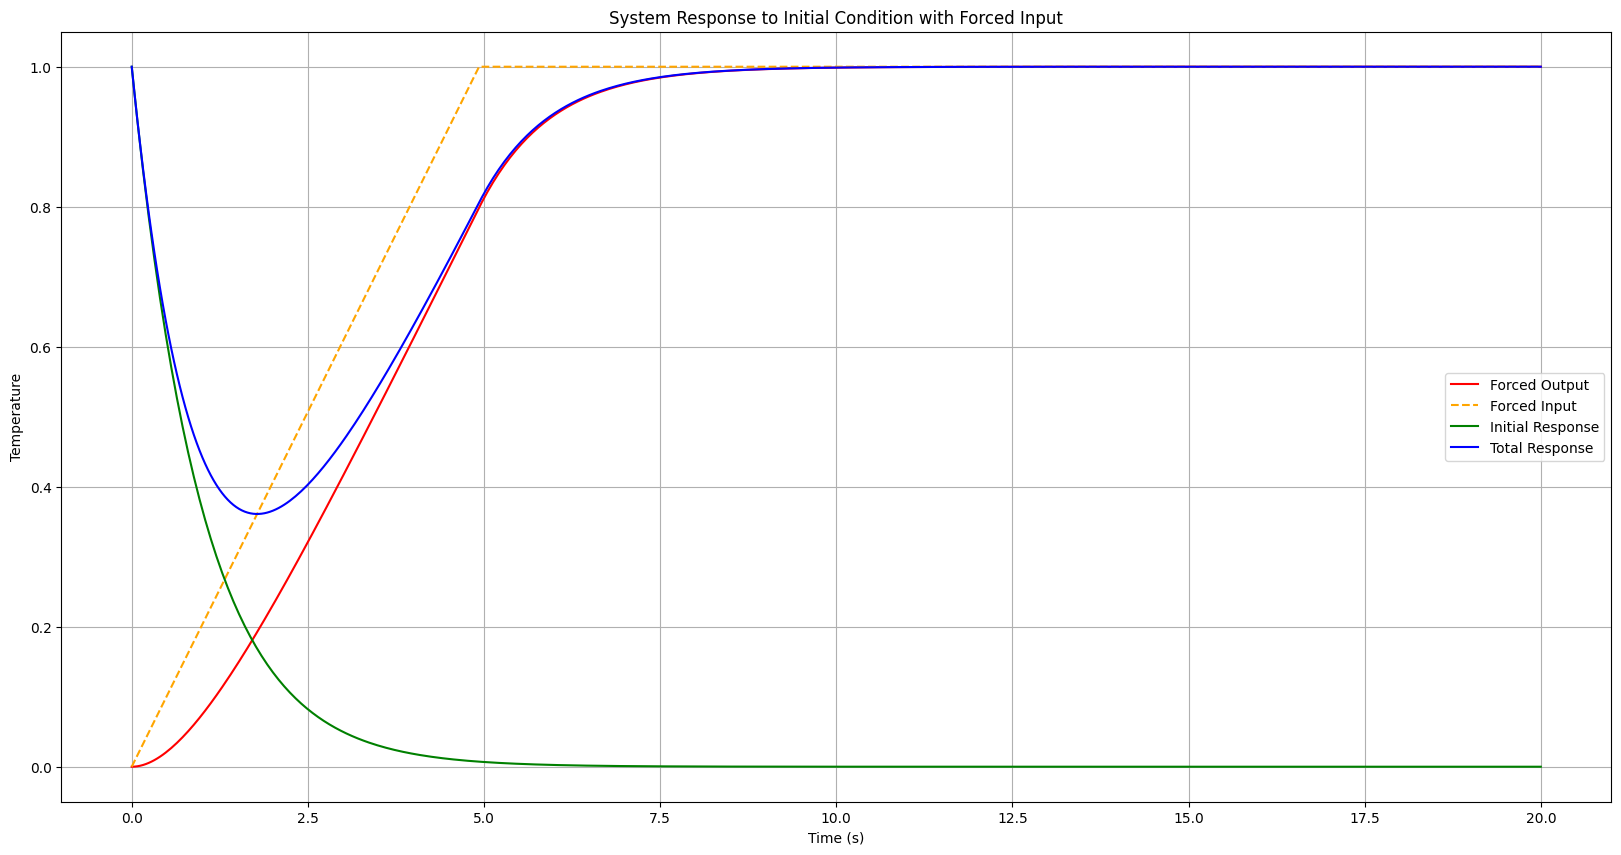

FloatSlider(value=1.0000000000000002, description='G:', max=5.0, min=0.1)

FloatSlider(value=1.0000000000000002, description='C:', max=5.0, min=0.1)

FloatSlider(value=1.0000000000000036, description='T0:', max=40.0, min=-15.0)

FloatSlider(value=1.0, description='Input:', max=30.0, step=0.5)

Dropdown(description='Input Type:', index=1, options=('Constant', 'Ramp (5s)', 'Ramp (15s)', 'Sinusoidal'), va…

ToggleButton(value=True, description='Show Initial Response')

ToggleButton(value=True, description='Show Total Response')

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from IPython.display import clear_output
import ipywidgets as widgets

# Function to update the plot
def update_plot_fc(t_0, input_type, show_initial_response, show_total_response):
    clear_output(wait=True)  
    system = create_system(G_slider.value, C_slider.value)  
    
    plt.figure(figsize=(20, 10))

    # Simulate the response to the current initial condition
    t, initial_response = ct.initial_response(system, T=time, X0=[t_0])
    
    # Generate the forced input
    input_fc = generate_input(input_type, time)
    
    # Use control's forced_response to get output for the input signal
    t, forced_response = ct.forced_response(system, T=time, U=input_fc)
    
    # Total response
    total_response = initial_response + forced_response
    
    # Plot the forced input response
    plt.plot(t, forced_response, label='Forced Output', color='red')
    plt.plot(t, input_fc, label='Forced Input', color='orange', linestyle='--')
    # Plot initial response only if the toggle is on
    if show_initial_response:
        plt.plot(t, initial_response, label='Initial Response', color='green')
        
    # Plot total response only if the toggle is on
    if show_total_response:
        plt.plot(t, total_response, label='Total Response', color='blue')

    plt.title('System Response to Initial Condition with Forced Input')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature')
    plt.grid()
    plt.legend()
    plt.show()

    # Display sliders and dropdown again
    display(G_slider, C_slider, t_0_slider, forced_input_slider, 
            input_type_dropdown, show_initial_response_button, 
            show_total_response_button)


# Create sliders for G, C, t_0, and a dropdown for input type
G_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='G:')
C_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='C:')
t_0_slider = widgets.FloatSlider(value=1.0, min=-15.0, max=40.0, step=0.1, description='T0:')
forced_input_slider = widgets.FloatSlider(value=1.0, min=0, max=30.0, step=0.5, description='Input:')
input_type_dropdown = widgets.Dropdown(
    options=['Constant', 'Ramp (5s)', 'Ramp (15s)', 'Sinusoidal'],
    value='Ramp (5s)',
    description='Input Type:'
)

# Create toggle buttons for showing the initial response and total response
show_initial_response_button = widgets.ToggleButton(
    value=False,
    description='Show Initial Response',
    button_style='',  
)

show_total_response_button = widgets.ToggleButton(
    value=False,
    description='Show Total Response',
    button_style='',
)

# Observers for the sliders, dropdown, and toggle buttons
G_slider.observe(lambda change: update_plot_fc(t_0_slider.value, input_type_dropdown.value, 
                                                show_initial_response_button.value, 
                                                show_total_response_button.value), names='value')
C_slider.observe(lambda change: update_plot_fc(t_0_slider.value, input_type_dropdown.value, 
                                                show_initial_response_button.value, 
                                                show_total_response_button.value), names='value')
t_0_slider.observe(lambda change: update_plot_fc(change['new'], input_type_dropdown.value, 
                                                   show_initial_response_button.value, 
                                                   show_total_response_button.value), names='value')
forced_input_slider.observe(lambda change: update_plot_fc(t_0_slider.value, input_type_dropdown.value, 
                                                           show_initial_response_button.value, 
                                                           show_total_response_button.value), names='value')
input_type_dropdown.observe(lambda change: update_plot_fc(t_0_slider.value, change['new'], 
                                                           show_initial_response_button.value, 
                                                           show_total_response_button.value), names='value')
show_initial_response_button.observe(lambda change: update_plot_fc(t_0_slider.value, 
                                                                  input_type_dropdown.value, 
                                                                  change['new'], 
                                                                  show_total_response_button.value), names='value')
show_total_response_button.observe(lambda change: update_plot_fc(t_0_slider.value, 
                                                                 input_type_dropdown.value, 
                                                                 show_initial_response_button.value, 
                                                                 change['new']), names='value')

# Display sliders and initial plot
display(G_slider, C_slider, t_0_slider, forced_input_slider, 
        input_type_dropdown, show_initial_response_button, 
        show_total_response_button)
update_plot_fc(t_0_slider.value, input_type_dropdown.value, 
                show_initial_response_button.value, 
                show_total_response_button.value)


In [ ]:
Notions matrix transform etc

### Stability

The notion of stability is central in the study of control theory. The core idea behind stability is that the system should not behave abruptly. The response of the system should be controlled and predictible. Many notions of how to define stability exist.    

1. **Lyapnuov Stability**: A system is called stable in the sense of Lyapunov if, for any initial condition bounded by $\epsilon$, the ouput of the system is remains bounded by $\delta$ for zero input.
$$ 
    ||x(0)||\leq\epsilon\;,\; u(t) = 0 \implies ||x(t)||\leq\delta\;\forall\; t\geq 0
$$
This basically says, if you start close enough to the equillibrium point you can never go too far from it.

2. **Asymptotically stable**: A system is called locally asymptotically stable if for any initial condition bounded by $\epsilon$ the system 
(state) converges to origin as time progresses
$$
    ||x(0)||\leq\epsilon\;,\;u(t) = 0 \; \implies\; \lim_{t\rightarrow\infty}||x(t)|| = 0
$$
This basically goes a step further than lyapunov stability and says that the system not only does not go too far, but also slowly approaches the equillibrium point.  
If this condiiton is satisfied for all possible intial conditions, the systenm is called *gloablly asymptotically stable*.\

Up unitl now for stability, we have considered systems without input. We can also define stability of systems with input.  
3. ****BIBO stability**: A system is called *Bounded Input Bounded Output stable*, if for any bounded input the system will produce an bounded output
$$ 
    ||u(t)||\leq\epsilon\:\forall\;t\geq 0\;,\: x_0=0\;\implies||y(t)||\leq\delta\:\forall\;t\geq 0
$$


### Conditions For stability
Now that the notions of stability are known, Lets look into how can we check for them.
For a given LTI system
$$
    \dot{x} = Ax + Bu \\
    y = Cx + Du
$$

Stability is determined by the matrix $A$  (here a trivial assumption is that the matrices $B,C,D$ have all finite values). The conditions for stability are as follows, $\lambda_i$ denoting the eigenvalues of $A$:
1. If $A$ is digonalisable $\implies$ Lyapunov stable if $Re(\lambda_i)\leq 0$,   Asymptotically stable if $Re(\lambda_i)<0$  for all $i$
2. If $A$ is not digonalisable $\implies$ Lyapunov stable if $Re(\lambda_i)\leq 0$ for all $i$, and no repaeted eigenvalues with 0 real part

#### Stability and Feedback 

### Inverted Pendulum Exmaple
TODO: diagram
<!-- ![Image Title](.\media\Pendulum.png) -->


<!-- <object data=".\media\pendulum-v3.pdf" type="application/pdf" width="700px" >
<embed src=".\media\pendulum-v3.pdf">
    <p>This browser does not support PDFs. Please download the PDF to view it: <a href="http://yoursite.com/the.pdf">Download PDF</a>.</p>
</embed>
<iframe src = ".\media\pendulum-v3.pdf">
</object> -->


#### Modelling
The equations for the pendulum can be derived using basic mechanics.
$$

$$


#### Output response 
## Code for interactive plot
# Initialize a display object
output = widgets.Output()

# Function to update the plot and title
def update_plot(control_off_checkbox, control_on_checkbox, Kp_slider, Kd_slider):
    with output:
        output.clear_output(wait=True)  # Clear the previous output
        # two subplots next to each other with given figure size:
        fig, axs = plt.subplots(1, 2, figsize=(20,5))
        
        if control_off_checkbox:
            x_out = run_sim(control_on=False, K_p=Kp_slider, K_d=Kd_slider)
            axs[0].plot(x_out[:,0], label='No Feedback', color='red')
            axs[1].plot(x_out[:,1], label='No Feedback', color='red')
        
        if control_on_checkbox:
            x_out = run_sim(control_on=True, K_p=Kp_slider, K_d=Kd_slider)
            axs[0].plot(x_out[:,0], label='With Feedback', color='blue')
            axs[1].plot(x_out[:,1], label='With Feedback', color='blue')
        
        # x label with latex format of theta
        axs[0].set_xlabel(r'Time: t[s]')
        axs[0].set_ylabel(r'Angle: $\theta(t) [rad]$')
        axs[1].set_xlabel(r'Time: t[s]')
        axs[1].set_ylabel(r'Angular Velocity: $\dot\theta(t)[rad/s]$')
        for ax in axs:
            xticks = ax.get_xticks()  # Get current x-ticks
            ax.set_xticks(xticks)  # Fix the ticks first
            ax.set_xticklabels([f'{int(tick/100)}' for tick in xticks])  # Divide x-ticks by 100

        if control_off_checkbox or control_on_checkbox: # avoids legend error if none of the functions are selected
            axs[0].legend()
            axs[1].legend()
        axs[0].grid()
        axs[1].grid()
        plt.show()

# Create checkboxes to show controlled and uncontrolled plots
control_off_checkbox = widgets.Checkbox(value=True, description='Control off')
control_on_checkbox = widgets.Checkbox(value=False, description='Control on')

# Create a slider for Kp and Kd
Kp_slider = widgets.FloatSlider(value=0, min=0, max=70, step=0.1, description="K_p gain")
Kd_slider = widgets.FloatSlider(value=0, min=0, max=5, step=0.1, description="K_d gain")

# Arrange checkboxes in a vertical box
checkboxes_box = widgets.VBox([control_off_checkbox, control_on_checkbox])

# Arrange the checkboxes box and slider in a horizontal box
controls_box = widgets.HBox([checkboxes_box, widgets.VBox([Kp_slider, Kd_slider])])

# Link the widgets to the update_plot function
widgets.interactive_output(update_plot, {
    'control_off_checkbox': control_off_checkbox,
    'control_on_checkbox': control_on_checkbox,
    'Kp_slider': Kp_slider,
    'Kd_slider': Kd_slider
})

# Display the controls and the plot
display(controls_box, output) 

#### Linearisation

#### Stability

#### Feedback Control